# 09-文件与异常

- 9.1 从文件中读取数据
- 9.2 写入文件
- 9.3 异常
- 9.4 存储数据（json格式）

## 9.1 从文件中读取数据

In [1]:
with open('pi_digit.txt') as file_object:
    contents = file_object.read()
    print(contents)

3.141592635
  897932384
  626433832


1. with语句块：自动执行文件对象的初始化和关闭操作
2. open()函数：参数为文件名，返回文件对象
3. 文件对象的read()方法：读取整个文件的内容，返回字符串

教材第三版的代码：

- 导入pathlib模块的Path类
- 利用Path类来读取数据
- pathlib模块的文档: [pep428](https://pathlib.readthedocs.io/en/pep428)

In [3]:
from pathlib import Path

path = Path('pi_digit.txt')
contents = path.read_text()
print(contents)

lines = contents.splitlines()
for line in lines:
    print(line)

3.141592635
  897932384
  626433832
3.141592635
  897932384
  626433832


- 相对路径（推荐）：相对于当前运行的程序所在的目录的路径
- 绝对路径：文件系统中文件的完整路径

In [5]:
from pathlib import Path

# 使用相对路径获取数据，
# .表示当前文件夹
# ./data是子文件夹
path = Path('./data/pi_digit2.txt')
contents = path.read_text()
print(contents)

3.141592635
  897932384
  626433832
  324324324


In [4]:
# 如何获取当前路径下的所有文件名
import os

# 获取到当前路径
current_dir = os.getcwd()
print(current_dir)

# 列举并打印当前路径下的所有文件名
files = os.listdir(current_dir)
files

c:\Users\zhouj\workspace\python_course\src\09-files-and-exceptions


['09-files-and-exceptions - Jupyter Notebook.pdf',
 '09-files-and-exceptions.ipynb',
 'alice.txt',
 'chinese.txt',
 'data',
 'file_path.py',
 'fruits.json',
 'img',
 'little_women.txt',
 'moby_dick.txt',
 'new_fruits.json',
 'numbers.json',
 'picture.jfif',
 'pi_digit.txt',
 'pi_million_digits.txt',
 'program.txt',
 'programming.txt',
 'users.json']

使用`..`打开上一级目录中的文件

In [6]:
with open('../08-classes/car.py') as file:
    contents = file.read()
    print(contents)

class Car:
    """A simple attempt to represent a car."""

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0
        
    def get_descriptive_name(self):
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()
    
    def read_odometer(self):
        print(f"This car has {self.odometer_reading} miles on it.")
        
    def update_odometer(self, mileage):
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")
    
    def increment_odometer(self, miles):
        self.odometer_reading += miles

class Battery:
    """A simple attempt to model a battery for an electric car."""
    
    def __init__(self, battery_size=75):
        """Initialize the battery's attributes."""
        self.battery_size = battery_size

    def describe_battery(self):
  

文件对象的操作：

- 在操作文件对象时，使用的是一个文件流对象，读文件和写文件都会改变文件指针的位置。
- tell方法：返回当前文件对象的指针位置
- seek方法：改变文件指针的位置

In [8]:
with open('pi_digit.txt') as file_object:
    print(file_object.tell())  # 0
    contents = file_object.read()
    print(file_object.tell()) # 37
    file_object.seek(0)   
    print(file_object.tell()) # 0
    contents10 = file_object.read(10)
    print(contents10)
    print(file_object.tell()) # 10

0
37
0
3.14159263
10


逐行读取文件：

- 使用循环遍历文件对象，每次读取一行
- 使用readlines方法，将文件对象的每一行存储在一个列表中

In [9]:
with open('pi_digit.txt') as file_object:
    for line in file_object:
        print(line.rstrip())

3.141592635
  897932384
  626433832


In [11]:
with open('pi_digit.txt') as file_object:
    # lines是一个list类型的数据，元素是文件中的一行内容
    lines = file_object.readlines()

print(lines)
for line in lines:
    print(line.rstrip())

['3.141592635\n', '  897932384\n', '  626433832']
3.141592635
  897932384
  626433832


圆周率

- 圆周率是圆的周长与直径的比例，有无限位数而且永远不会重复。
- 已知的pi的位数：105 trillion digits
- [十亿位数的pi](https://stuff.mit.edu/afs/sipb/contrib/pi/pi-billion.txt)

In [13]:
with open('pi_million_digits.txt') as file_object:
    lines = file_object.readlines()
    
pi_string = ''
for line in lines:
    pi_string += line.strip()

# 打印圆周率前面的52位数字
print(pi_string[:52] + '...')

# 打印字符串长度
print(len(pi_string))

3.14159265358979323846264338327950288419716939937510...
1000002


圆周率包含你的生日吗？

In [16]:
birthday = '120109'
if birthday in pi_string:
    print('Your birthday appears in the first million digits of pi!')
else:
    print('Your birthday does not appear in the first million digits of pi.')

Your birthday appears in the first million digits of pi!


[关于pi的一个解读？](https://www.bilibili.com/video/BV1E4411k7tF/)

所有可能的信息（包括生日、电话号码、名字、所有可能发生的事情）都会出现在圆周率pi中吗？

- A. 有可能
- B. 不太可能
- C. 完全不可能
- D. 不知道

In [17]:
name = 'mary'
b_name = bytes(name, encoding='utf-8')
print(type(b_name))

<class 'bytes'>


In [20]:
import sys

name1 = b'Ma'  # bytes类型的字符串

decimal_name1 = int.from_bytes(name1, sys.byteorder)
print(decimal_name1)
if str(decimal_name1) in pi_string:
    print('Your name appears in the first million digits of pi!')
else:
    print('Your name does not appear in the first million digits of pi.')

24909
Your name appears in the first million digits of pi!


In [22]:
name2 = bytes('三'.encode('utf-8'))
decimal_name2 = int.from_bytes(name2, sys.byteorder)
print(decimal_name2)
if str(decimal_name2) in pi_string:
    print('Your name appears in the first million digits of pi!')
else:
    print('Your name does not appear in the first million digits of pi.')

9025764
Your name does not appear in the first million digits of pi.


写入文件

- 使用文件对象的write方法，参数是要写入文件的字符
- 写入模式，write方法会返回一个整数（表示写入的字节数）

In [23]:
with open('program.txt', 'w') as file_object:
    n = file_object.write('I love programming.\n')
    print(f'写入了{n}个字符')

写入了19个字符


- 使用换行符’\n’写入多行文件。
- 使用附加模式（打开模式参数：’a’）打开文件，可以在文件末尾写入新的内容，不会清空原有文件的内容。

In [24]:
with open('program.txt', 'a') as file_object:
    file_object.write('I also love finding meaning in large datasets.\n')
    file_object.write('I love creating apps that can run in a browser.\n')        

如果使用`pathlib`来写入文件

In [25]:
from pathlib import Path

path = Path('program.txt')

with path.open('a') as file_object:
    file_object.write('I also love finding meaning in large datasets.\n')
    file_object.write('I love creating apps that can run in a browser.\n') 

open函数的第二个参数可以指定文件的打开模式

- ‘w’  写入模式，会覆盖原有的数据
- ‘r’   读取模式，默认的模式
- ‘a’   附加模式，会在文件末尾附加新的内容
- ‘r+’  读写模式
- ‘rb’ or ‘wb’    字节数据的读取/写入模式

In [26]:
with open('picture.jfif', 'rb') as file_object:
    image_bytes = file_object.read()
    print(image_bytes[:20])

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'


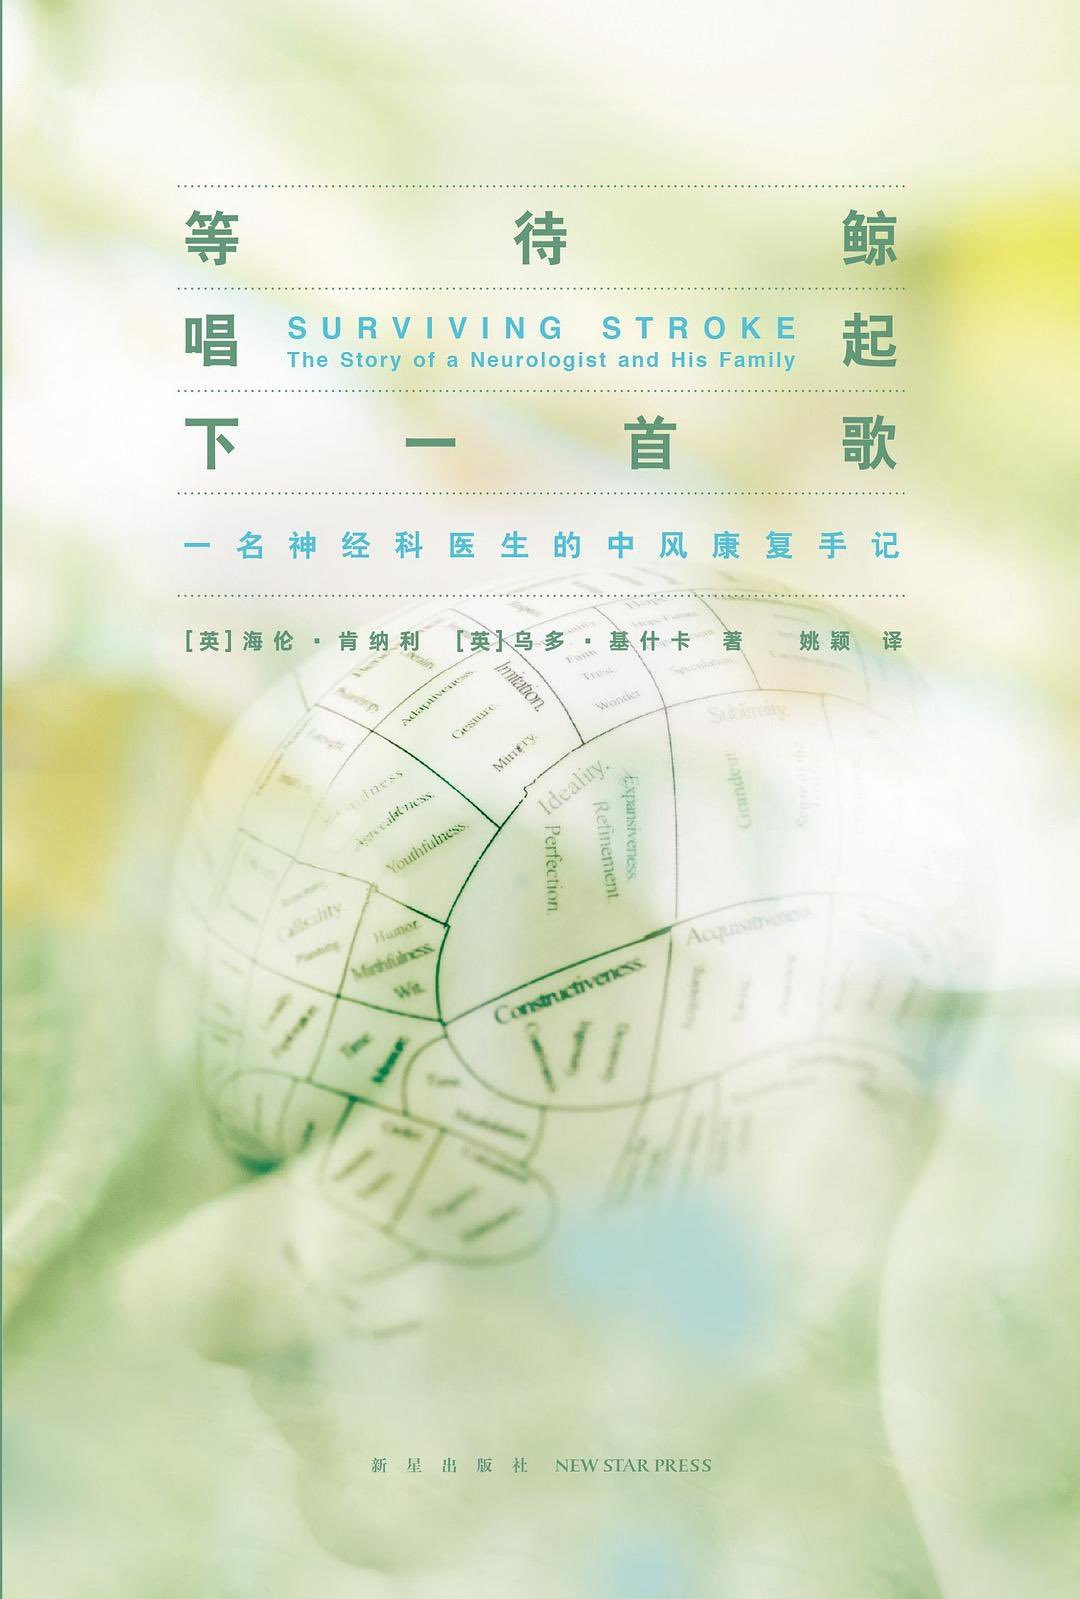

In [27]:
from IPython.display import Image, display

# Assuming you have an image in bytes format stored in a variable named 'image_bytes'
# Display the image
display(Image(image_bytes))

- 字符数据： ASCII字符、UTF字符、GBK字符等等字符编码的数据，字符数据是可以用记事本打开可读的。
- 字节数据：字节数据用0和1表示，非字符编码的字节数据用记事本打开不可读。

哪些格式的文件是字符数据，哪些是字节（非字符）数据？

- 字符格式的文件：txt, 源代码，JSON，HTML，xml, csv， markdown， latex
- 字节格式的文件：jpg， 目标代码文件，PDF, OFFICE文件（word，ppt，excel）， 数据库


### 为什么中文会出现乱码，而英文不会出现乱码？

![Unicode sandwich](./img/2024-04-06-14-44-36.png)

如何避免出现乱码

- 解码和编码使用相同的编码格式。
- 例如：utf-8编码的字符文件必须使用utf-8格式解码打开。
- Python在打开文件时，可以使用encoding参数指定字符编码。

In [28]:
foo = u'你好，谢谢你的参加。'
with open('chinese.txt', 'r+', encoding='utf-8') as file_object:
    file_object.write(foo)
    file_object.seek(0)
    contents = file_object.read()
    print(contents)    

你好，谢谢你的参加。


扩展阅读:

- [The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode in 2023](https://tonsky.me/blog/unicode/)
- [中文版：2023 年每个软件开发者都必须知道的关于 Unicode 的最基本的知识（仍然不准找借口！）](https://blog.xinshijiededa.men/unicode/)

如何在Markdown中使用emoji😀👋👩‍🌾

- 安装VSCODE插件: [Markdown Emoji](https://marketplace.visualstudio.com/items?itemName=bierner.markdown-emoji)
- 查看[emoji cheat sheet](https://github.com/ikatyang/emoji-cheat-sheet)


使用Python代码处理emoji

In [29]:
# 安装emoji模块
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [30]:
import emoji

emoji_icon = "😄"  # Emoji icon
emoji_code = emoji.demojize(emoji_icon)  # Convert emoji icon to code

print(emoji_code)  # Output: :smile:
print(emoji.emojize(emoji_code))  # Convert emoji code to icon

:grinning_face_with_smiling_eyes:
😄


- 因为Python是解释型语言，所以Python不会区分编译时错误和运行时错误。
- 异常（Exception）（或者错误 Error）必须被捕获，然后由程序处理，不然程序会崩溃退出。

## 异常

那种处理异常的方式更好？

- 异常被捕获，程序报错或者退出。(更常见)
- 异常不被捕获，静默错误信息。（罕见）

### ZeroDivisionError

In [31]:
print(5/0)

ZeroDivisionError: division by zero

### try-except语句

In [32]:
try:
    print(5/0)
except ZeroDivisionError:
    print('You can not divide by zero!')

You can not divide by zero!


### try-except-else语句

In [34]:
first_number = 100
second_number = 2

try:
    answer = first_number / second_number
    
except ZeroDivisionError:
    print('You can not divide by zero!')

# try代码块如果没有出错，执行else代码块
# try代码块如果出现了错误，不会执行else代码块
else:
    print(answer)

50.0


### IO异常

IO操作是容易产生的异常的场景，一定要记得处理各种可能出现的IO异常：

- FileNotFoundError   打开文件时，文件可能不存在
- 其他可能出现的IO异常：
  - 网络连接失败
  - 服务器连接超时
  - 打印机无法连接

In [35]:
file_name = 'harry_potter.txt'

with open(file_name) as file_object:
    contents = file_object.read()
    print(contents)

FileNotFoundError: [Errno 2] No such file or directory: 'harry_potter.txt'

In [38]:
file_name = 'alice.txt'

try:
    with open(file_name) as file_object:
        contents = file_object.read()
except FileNotFoundError:
    print(f'Sorry, the file {file_name} does not exist.')
else:
    print(contents[:20])

[Alice's Adventures 


### 两种不同的编码风格

EAFP：Easier to ask for forgiveness than permission。意思是容易请求原谅而不是事前征求许可。

- 这种编码风格强调编写假定操作有效并在出现异常时进行处理的代码。
  
- 它基于一种哲学，即处理异常（即请求原谅）比事先检查条件（即征求许可）更容易。
  
- 采用 EAFP 风格的代码通常使用 try-except 块来捕获异常并优雅地处理它们，避免不必要的检查并减少代码复杂性。
  
- 在 Python 中，这种风格非常常见，其中 try-except 机制是高效的，并且异常被认为是控制流程的正常部分。
  
- 它可以导致更短、更简明的代码，因为它避免了过多的检查，使得代码更易读和可维护。

LBYL (Look Before You Leap):

- 这种编码风格专注于在执行操作或动作之前检查前提条件和条件。
  
- 它强调在执行特定操作之前验证输入、条件或属性，以防止异常或不希望的行为。
  
- 采用 LBYL 风格的代码通常使用 if 语句、条件检查和断言来验证条件，然后再继续程序流程。
  
- 它可以提供对代码行为的明确控制，并在问题或异常发生之前潜在地防止问题。
  
- 在某些情况下，LBYL 编码风格可能会导致代码变得更长、更冗长，因为需要进行多个条件检查和验证。

## 分析文本

- 打开《Alice in Wonderland》的文本文件，计算包含多少个单词。
- 读取文件内容保存到字符串。
- 使用字符串的split()方法分割字符串，得到单词列表。
- 使用len函数计算列表的长度。

In [39]:
file_name = 'alice.txt'

try:
    with open(file_name) as file_object:
        contents = file_object.read()
except FileNotFoundError:
    print(f'Sorry, the file {file_name} does not exist.')
else:
    words = contents.split()
    num_words = len(words)
    print(f'The file {file_name} has about {num_words} words.')

The file alice.txt has about 26443 words.


- 打开多个文本文件进行分析。
- 静默失败： 
  - 在except代码块使用pass语句
  - pass语句什么都不做，可以起到一个占位的作用

In [40]:
def count_words(filename):
    """Count the approximate number of words in a file."""
    
    try:
        with open(filename, encoding='utf-8') as file_object:
            contents = file_object.read()
    except FileNotFoundError:
        # print(f'Sorry, the file {filename} does not exist.')
        pass
    else:
        words = contents.split()
        num_words = len(words)
        print(f'The file {filename} has about {num_words} words.')

In [41]:
filenames = ['alice.txt', 'siddhartha.txt', 'moby_dick.txt', 'little_women.txt']
for filename in filenames:
    count_words(filename)

The file alice.txt has about 26443 words.
The file moby_dick.txt has about 212030 words.
The file little_women.txt has about 189142 words.


文件对象的操作方法：

- close()：关闭文件
- read(size)：从文件中读取指定大小的数据
- readline()：从文件中读取一行数据
- readlines()：读取所有行并返回一个列表
- write()：写入数据到文件
- writelines()：写入多行数据到文件
- seek(offset[, whence])：移动文件指针到指定位置
- tell()：返回文件指针当前位置
- next()：迭代器，返回下一行

## json数据

- Python语言内置的`list`和`dict`数据类型恰好对应了JSON的数组和对象，在读取或者写入json数据时都不需要额外的转换。
- 列表： `[ "Apple", "Banana", "Orange" ]`
- 字典(对象)：`{"name": "Jack", "age": 30, "favoriteSport" : "Football"}`
- 嵌套的数据：

```json
{ 
    "name":"Jack", 
    "age":30, 
    "contactNumbers":[ 
        { "type":"Home", "number":"123 123-123" }, 
        { "type":"Office", "number":"321 321-321" } ], 
    "spouse": null, 
    "favoriteSports":[ "Football", "Cricket" ] 
}
```



In [1]:
import json
numbers = [2, 3, 5, 7, 11, 13]

filename = 'numbers.json'
with open(filename, 'w') as f:
    # 写json文件
    json.dump(numbers, f)    

In [2]:
with open(filename, 'r') as f:
    # 读json文件
    loaded_nums = json.load(f)
    print(loaded_nums)

[2, 3, 5, 7, 11, 13]


- with 代码块
- open打开文件
- json.dump() ：   存储json数据到文件
- json.load()：  从文件读取json数据

In [3]:
with open('users.json') as f:
    user_profile = json.load(f)
    print(user_profile)
    print(user_profile.keys())
    print(user_profile.values())

{'name': 'Jack', 'age': 30, 'contactNumbers': [{'type': 'Home', 'number': '123 123-123'}, {'type': 'Office', 'number': '321 321-321'}], 'spouse': None, 'favoriteSports': ['Football', 'Cricket']}
dict_keys(['name', 'age', 'contactNumbers', 'spouse', 'favoriteSports'])
dict_values(['Jack', 30, [{'type': 'Home', 'number': '123 123-123'}, {'type': 'Office', 'number': '321 321-321'}], None, ['Football', 'Cricket']])


## 重构(Refactor)

重构是指在不改变软件的外部行为的前提下，对软件内部的代码进行优化、改进和重组的过程。它是一种对现有代码进行调整、重组、精简的软件开发过程，旨在通过改进设计和代码质量来提高软件的可维护性、可读性和可重用性。

重构的目标可能包括但不限于：
- 增强代码的可读性和可理解性。
- 提高代码的可重用性和扩展性。
- 减少代码的复杂度，提高代码的维护性。
- 提高代码的性能、效率和可靠性。
- 增加代码的可测试性，从而更容易进行单元测试和功能测试。

重构时可以采用各种技术和方法，例如:
- 提取方法（extract method）
- 重组类（reorganize classes）
- 简化条件表达式（simplify conditional expressions）
- 消除重复代码（eliminate duplicate code）等。

关键是要保证在重构过程中不改变程序的外部行为，以避免引入潜在的问题和错误。

重要的是要记住，重构不仅仅是修改代码，而是一种有计划、有目的性的活动。通过应用重构技术，开发人员能够改进和优化现有代码，使其更具可读性、可维护性和可扩展性，从而使软件系统更加健壮和可靠。

在线阅读： [重构 改善既有代码的设计第二版]（https://book-refactoring2.ifmicro.com/）

![重构 改善既有代码的设计第二版](./img/2023-10-18-08-25-19.png)